<a href="https://colab.research.google.com/github/chewzzz1014/DPhi-Bootcamp/blob/master/notes/deep-learning/SequentialModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

**Creating a Sequential Model with 3 layers**

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

# Alternative 1
model = Sequential([
      layers.Dense(2, activation="relu", name="layer1"),
      layers.Dense(3, activation="relu", name="layer2"),
      layers.Dense(4, name="layer3")
])
x = tf.ones((3,3))
y = model(x)

# Alternative 2
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")
x = tf.ones((3, 3))
# stacking layers
y = layer3(layer2(layer1(x)))     # *

**Add Input**
- If the input shape isn't specify when creating the Sequential Model, the model will have no weight.

In [6]:
# Alternative 1

model = Sequential()
# input is 1 Dimension Tensor
model.add(keras.Input(shape=(4,)))

# Alternative 2

model = Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

**Model Summary**

Contains:
- Name of Model
- The layers and their order in the model.
- The output shape of each layer.

    `(batch_size, units)`
- The number of parameters (weights) in each layer. 

  `num_parameters = output_size*(input_size+1)`
- The total number of parameters (weights) in the model.

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


**Plot Model**

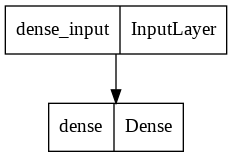

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model)

**Examples**

**1. Sequential MLP**
- Accept 8 inputs
- One hidden layer with 10 neurons
- Output layer with one neuron

In [9]:
model = Sequential()
model.add(layers.Dense(10, input_shape=(8,)))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                90        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


**2. Deep MLP**
- 5 hidden layers

In [10]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_shape=(8,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               900       
                                                                 
 dense_4 (Dense)             (None, 80)                8080      
                                                                 
 dense_5 (Dense)             (None, 30)                2430      
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 11,781
Trainable params: 11,781
Non-trai

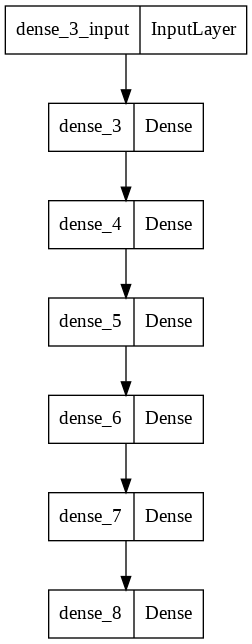

In [11]:
plot_model(model)

**3. Functional Model API**
- A way to build graphs of layers.
- It involves clearly connecting the output of one layer to the input of another layer. Each connection is specified.

In [13]:
# example of a model defined with the functional api
from tensorflow.keras import Model, Input

# define the layers
x_in = Input(shape=(8,))
x = Dense(10)(x_in)
x_out = Dense(1)(x)
# define the model
model = Model(inputs=x_in, outputs=x_out)

# print summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_9 (Dense)             (None, 10)                90        
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


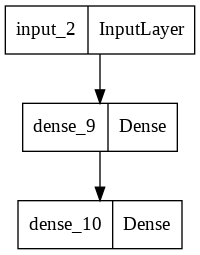

In [14]:
plot_model(model)